In [1]:
import pandas as pd
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.externals.six import StringIO

#visualization
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import pydot

/Users/zlatakobzantsev/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [11]:
pluto_mn = pd.read_csv("../data/pluto/MN.csv")
pluto_bx = pd.read_csv("../data/pluto/BX.csv")
pluto_bk = pd.read_csv("../data/pluto/BK.csv")
pluto_qn = pd.read_csv("../data/pluto/QN.csv")
pluto_si = pd.read_csv("../data/pluto/SI.csv")

frames = [pluto_mn, pluto_bx, pluto_bk, pluto_qn, pluto_si]
pluto_nyc = pd.concat(frames)
#pluto_nyc.to_csv('../data/pluto/pluto_nyc.csv')

/Users/zlatakobzantsev/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (19,22,23,24,81) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/zlatakobzantsev/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (18,19,21,22,65,66,81) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/zlatakobzantsev/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (18,19,21,22,24,65,66,81) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/zlatakobzantsev/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (18,19,21,22,65,66,78,81) have mi

In [21]:
building_column_names = ["record","BBL","bbl_status","coreported_bbl","nyc_bin","street_number","street","borough",
                "zip","covered_building","benchmark_status","site_eui","norm_site_eui","source_eui","norm_source_eui",
                "water_intensity","water_benchmark_eligible","water_method","energy_star","total_ghg","direct_ghg",
                "indirect_ghg","building_sf","dof_gsf","primary_use","num_buildings"]
building_features = building_column_names[1:]
building_target = building_column_names[0]
building_data = pd.read_excel('http://www.nyc.gov/html/gbee/downloads/excel/2015_nyc_cy2014__ll84_disclosure_data.xlsx',
                na_values="Not Available",header=0,names=building_column_names)
building_data.head()

,Record Number,"NYC Borough, Block, and Lot (BBL)",Co-reported BBL Status,BBLs Co-reported,Reported NYC Building Identification Numbers (BINs),Street Number,Street Name,Borough,Zip Code,BBL on the Covered Buildings List,...,Automatic Water Benchmarking Eligible,Reported Water Method,ENERGY STAR Score,Total GHG Emissions (MtCO2e),Direct GHG Emissions (MtCO2e),Indirect GHG Emissions (MtCO2e),Reported Property Floor Area (Building(s)) (ft²),DOF Property Floor Area (Buildngs and Parking) (ft2),Primary Property Type - Self Selected,DOF Number of Buildings
0,7365.0,1009970029,NaN,NaN,1022631,1155,AVENUE OF THE AMER,MANHATTAN,10036.0,Yes,...,No,None,90,3054.3,0,3054.3,686902,734668.0,Office,1.0
1,8139.0,1013150001,NaN,NaN,1037545,655,3 AVENUE,MANHATTAN,10017.0,Yes,...,No,None,86,2453.3,0,2453.3,384432,380000.0,Office,1.0
2,8604.0,1009990019,NaN,NaN,1022667,114,WEST 47 STREET,MANHATTAN,10036.0,Yes,...,No,None,84,2961.2,0,2961.2,572369,565000.0,Financial Office,1.0
3,8841.0,1013190047,NaN,NaN,1037596,733,3 AVENUE,MANHATTAN,10017.0,Yes,...,No,None,75,2731.4,0,2731.4,362578,405399.0,Office,1.0
4,11809.0,1009950005,NaN,NaN,1085682,1472,BROADWAY,MANHATTAN,10036.0,Yes,...,No,None,61,13661.8,2557.4,11104.4,1601977,1642675.0,Office,1.0


In [14]:
# building_column_names = ["record","BBL","bbl_status","coreported_bbl","nyc_bin","street_number","street","borough",
#                 "zip","covered_building","benchmark_status","site_eui","norm_site_eui","source_eui","norm_source_eui",
#                 "water_intensity","water_benchmark_eligible","water_method","energy_star","total_ghg","direct_ghg",
#                 "indirect_ghg","building_sf","dof_gsf","primary_use","num_buildings"]
# building_features = building_column_names[1:]
# building_target = building_column_names[0]
# building_data = pd.read_csv("../data/2015_nyc_cy2014__ll84_disclosure_data.csv",header=0,names=building_column_names)
# building_data.head()


In [100]:
#buildingData = pd.read_csv("../data/2015_nyc_cy2014__ll84_disclosure_data.csv")
#buildingData.columns = buildingData.columns.str.lower().str.replace(" ","_").str.replace("-","").str.replace("(","_").str.replace(")","_").str.replace(",","_").str.replace("\r","_").str.replace("\/","_").str.replace("\n","_")

In [17]:
building_data.dtypes

Record Number                                                      float64
NYC Borough, Block, and Lot (BBL)                                    int64
Co-reported BBL Status                                              object
BBLs Co-reported                                                    object
Reported NYC Building Identification Numbers (BINs)                 object
Street Number                                                       object
Street Name                                                         object
Borough                                                             object
Zip Code                                                           float64
BBL on the Covered Buildings List                                   object
DOF Benchmarking Submission Status                                  object
Site EUI\n(kBtu/ft2)                                                object
Weather Normalized Site EUI\n(kBtu/ft2)                             object
Source EUI\n(kBtu/ft2)   

In [119]:
# [key for key in dict(building_data.dtypes) if dict(building_data.dtypes)[key] not in ['float64', 'int64']]

In [19]:
convert_to_float = ["coreported_bbl","nyc_bin","street_number","site_eui","norm_site_eui","source_eui",
                    "norm_source_eui","energy_star","total_ghg","direct_ghg","indirect_ghg","building_sf"]

In [20]:
building_data[convert_to_float] = building_data[convert_to_float].convert_objects(convert_numeric=True)
building_data.head()
building_data.dtypes
# building_data.apply(pd.to_numeric)


KeyError: "['coreported_bbl' 'nyc_bin' 'street_number' 'site_eui' 'norm_site_eui'\n 'source_eui' 'norm_source_eui' 'energy_star' 'total_ghg' 'direct_ghg'\n 'indirect_ghg' 'building_sf'] not in index"

In [128]:
# cols = building_data.columns.values.tolist()
# print cols
# building_data_objects = building_data.select_dtypes(include=['object'])
# building_data_objects

In [13]:
pluto_nyc.shape

(859205, 86)

In [10]:
building_data.isnull().head()
building_data.isnull().sum()

Record Number                                                       2170
NYC Borough, Block, and Lot (BBL)                                      0
Co-reported BBL Status                                             13306
BBLs Co-reported                                                   13306
Reported NYC Building Identification Numbers (BINs)                 2678
Street Number                                                        296
Street Name                                                          296
Borough                                                                0
Zip Code                                                            2360
BBL on the Covered Buildings List                                      0
DOF Benchmarking Submission Status                                     0
Site EUI\n(kBtu/ft2)                                                2881
Weather Normalized Site EUI\n(kBtu/ft2)                             4779
Source EUI\n(kBtu/ft2)                             

In [137]:
print building_data.shape
print 'total greenhouse gas emissions: \n', building_data['total_ghg'].describe()
print 'indirect greenhouse gas emissions: \n', building_data['indirect_ghg'].describe()
print 'energy star ratings: \n', building_data['energy_star'].describe()
print 'square footage of buildings reporting: \n', building_data['dof_gsf'].describe()
print 'primary property type: \n', building_data['primary_use'].describe()

(13974, 26)
total greenhouse gas emissions: 
count    1.068900e+04
mean     1.668260e+04
std      7.749364e+05
min      0.000000e+00
25%      3.611000e+02
50%      5.534000e+02
75%      1.026100e+03
max      6.052160e+07
Name: total_ghg, dtype: float64
indirect greenhouse gas emissions: 
count    1.099200e+04
mean     1.548464e+04
std      7.640136e+05
min      0.000000e+00
25%      8.370000e+01
50%      1.539500e+02
75%      4.075750e+02
max      6.052160e+07
Name: indirect_ghg, dtype: float64
energy star ratings: 
count    8506.000000
mean       55.346932
std        30.156627
min         0.000000
25%        31.000000
50%        59.000000
75%        81.000000
max       100.000000
Name: energy_star, dtype: float64
square footage of buildings reporting: 
count    1.367800e+04
mean     1.803697e+05
std      4.754714e+05
min      5.000800e+04
25%      6.540000e+04
50%      9.482800e+04
75%      1.650912e+05
max      2.760000e+07
Name: dof_gsf, dtype: float64
primary property type: 
count 

AttributeError: max must be larger than min in range parameter.

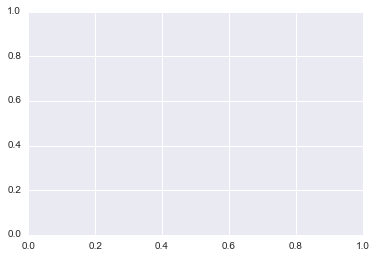

In [138]:
sns.plt.hist(building_data.total_ghg)
sns.plt.xlabel("Emissions")
sns.plt.ylabel("Number of Buildings")
# plt.title("Total Greenhouse Gas Emissions")
# plt.ylabel("Number of Buildings")
# plt.xlabel("Emissions")

ValueError: cannot copy sequence with size 2 to array axis with dimension 13974

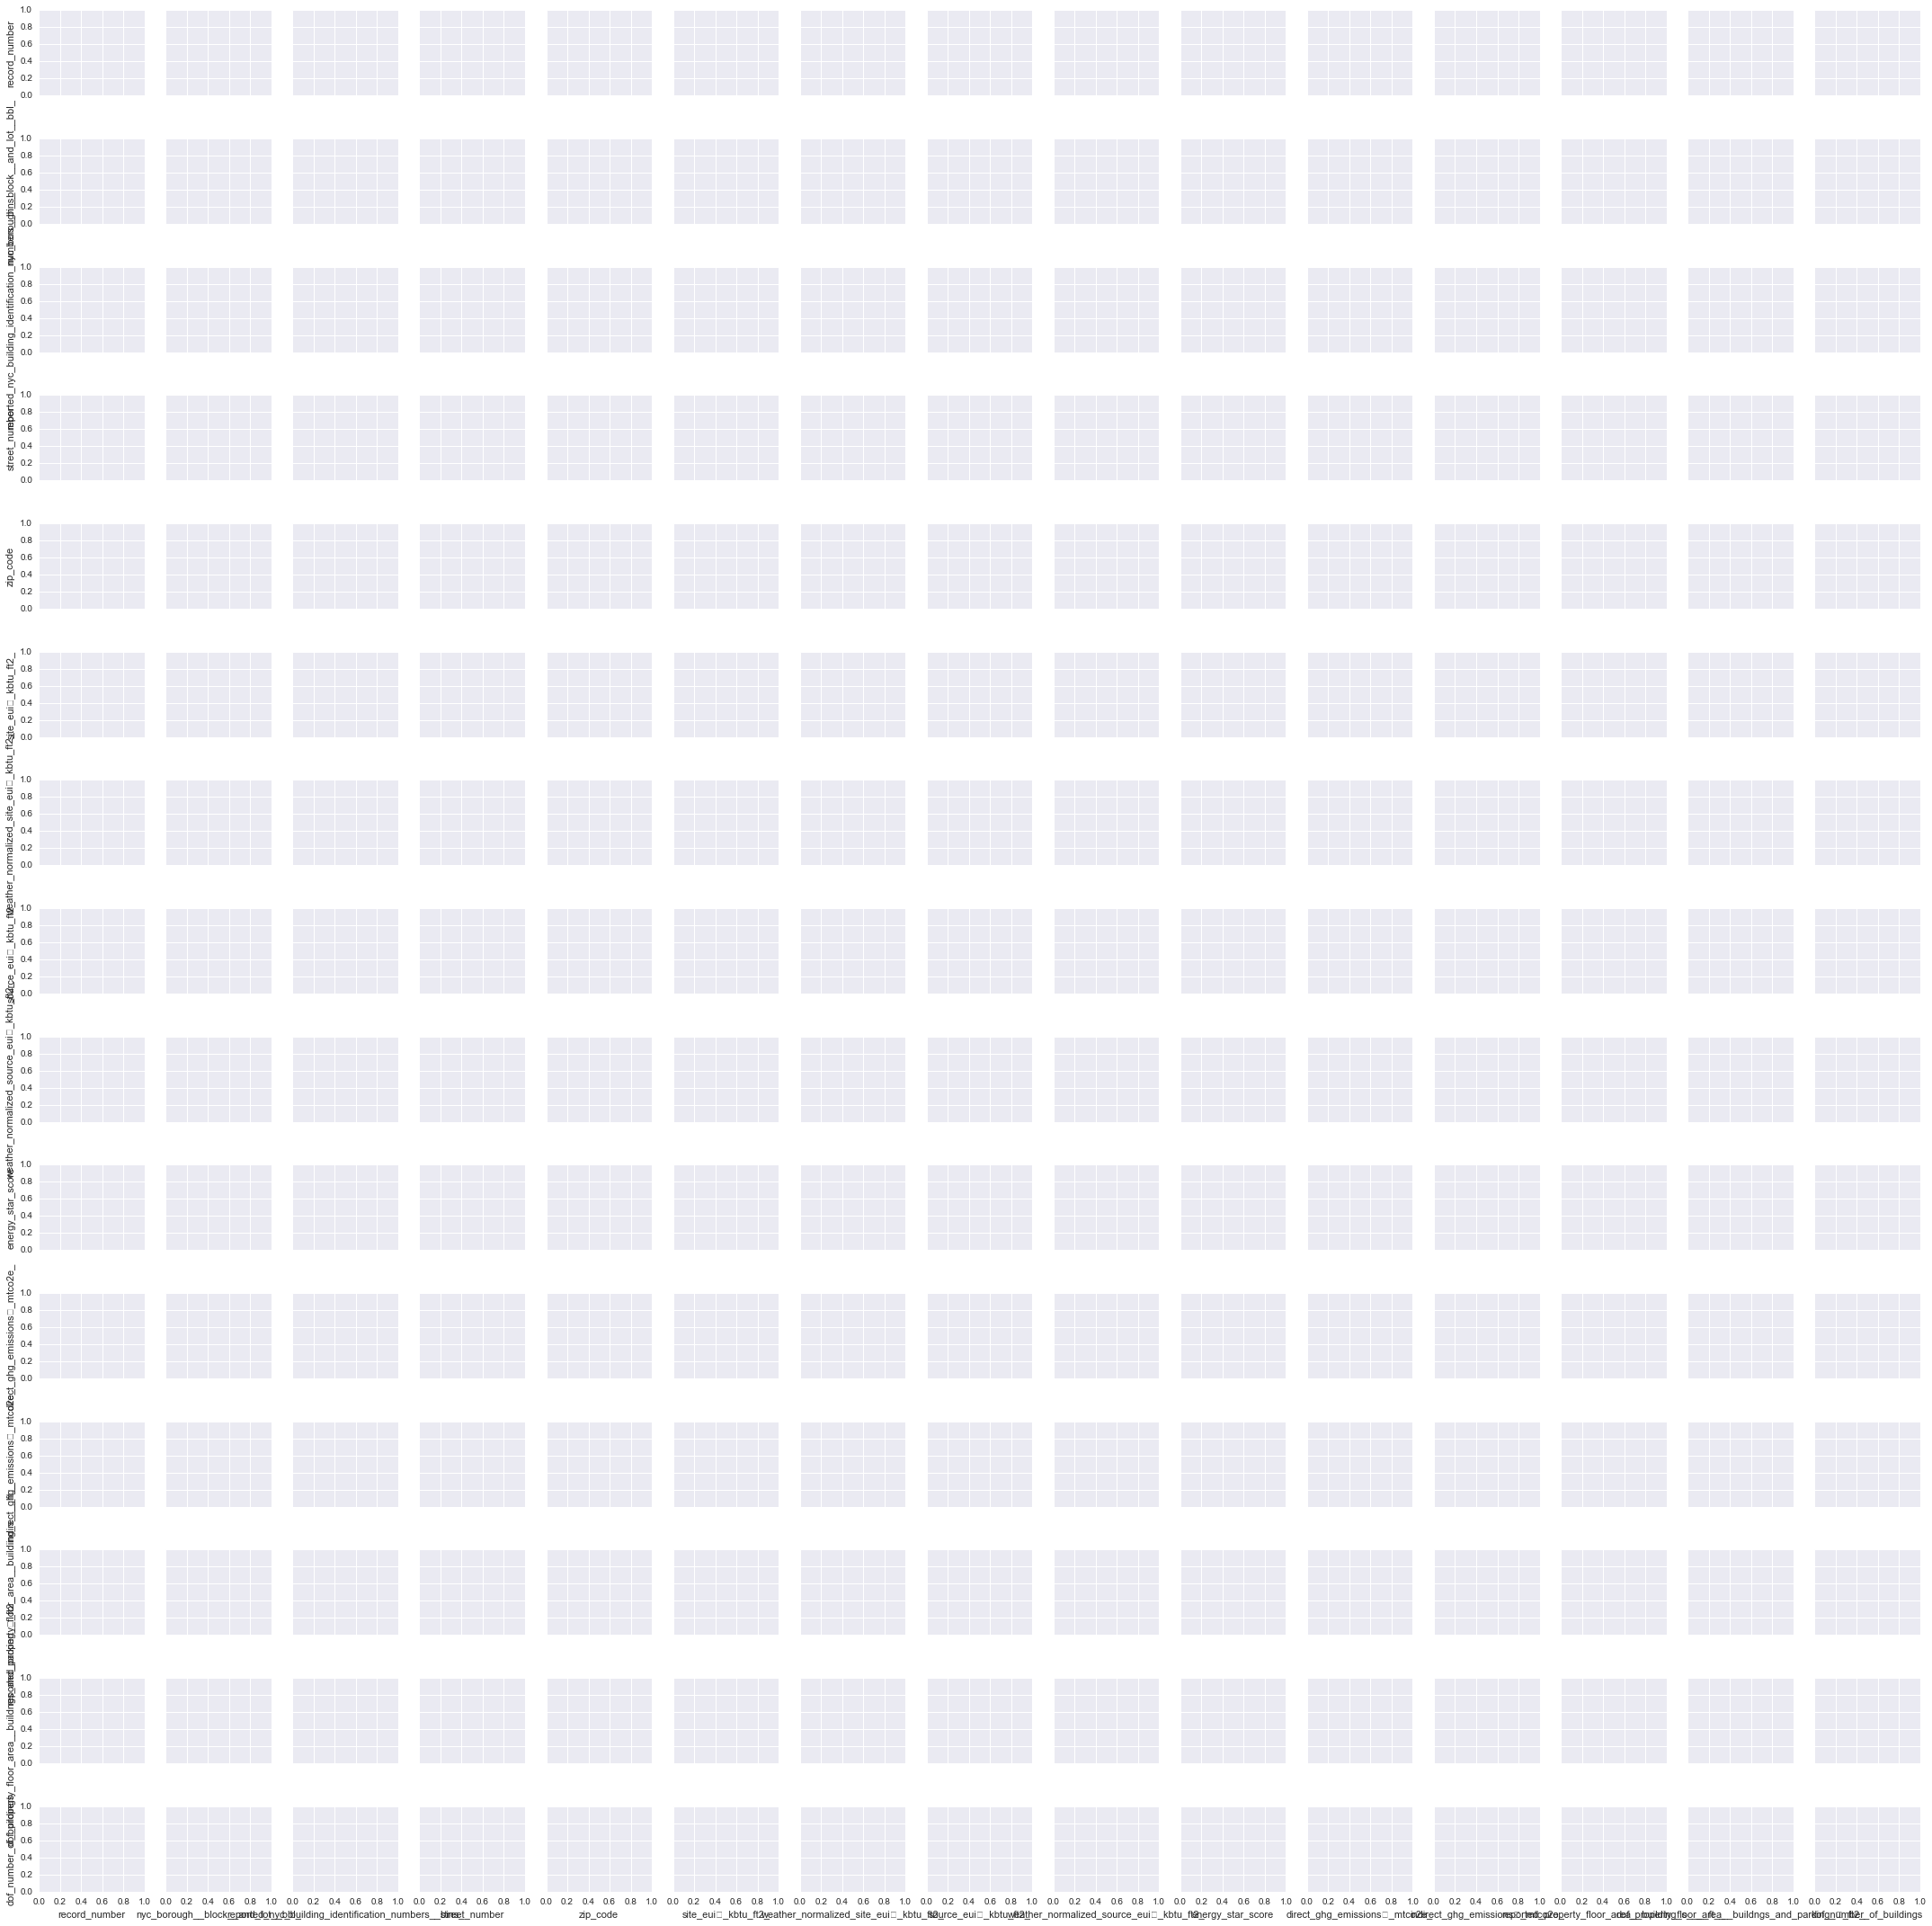

In [92]:
#sns.pairplot(buildingData[feature_names_buildings+['total_ghg_emissions\r_mtco2e_']],hue="total_ghg_emissions\r_mtco2e_", palette='coolwarm')